##### 1. LANÇAMENTO DOS DADOS #####

##### 1.1 Cliente

*--> Insira o nome do cliente/empresa*

In [314]:
# Cliente
cliente = 'JoSé da Silva ME'

##### 1.2 Período

*--> Insira os anos inicial (a primeira) e final (da última) das demonstrações contábeis que serviram de base para a análise*

In [315]:
# Ano Inicial
ano_inicial = 2021

In [316]:
# Ano Final
ano_final = 2023

##### CONFIGURAÇÃO DO AMBIENTE

##### Configuração do ambiente

In [317]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [318]:
# Função para calcular os índices contábeis
def calcular_indices_contabeis(df):
    indices = {}

    indices['Liquidez Corrente'] = df['Ativo Circulante'] / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Passivo Circulante: BP
    # => A liquidez corrente mede a capacidade da empresa de pagar suas obrigações de curto prazo.

    indices['Liquidez Seca'] = (df['Ativo Circulante'] - df['Estoques']) / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Estoque: BP
    # Passivo Circulante: BP
    # => A liquidez seca é uma medida de liquidez que desconsidera o estoque da empresa.

    indices['Margem Líquida'] = df['Lucro Líquido'] / df['Receita Total']
    # Lucro Líquido: DRE
    # Receita Total: DRE
    # => A margem líquida mede a porcentagem de lucro líquido que a empresa gera para cada real de receita.

    indices['ROA'] = df['Lucro Líquido'] / df['Ativo Total']
    # Lucro Líquido: DRE
    # Ativo Total: BP
    # => O retorno sobre ativos (ROA) mede a eficiência da empresa em gerar lucro a partir de seus ativos.

    indices['ROE'] = df['Lucro Líquido'] / df['Patrimônio Líquido']
    # Lucro Líquido: DRE
    # Patrimônio Líquido: BP
    # => O retorno sobre o patrimônio líquido (ROE) mede a eficiência da empresa em gerar lucro a partir de seu patrimônio líquido.

    indices['Endividamento'] = df['Passivo Total'] / df['Ativo Total']
    # Passivo Total: BP
    # Ativo Total: BP
    # => O endividamento mede a proporção de dívidas da empresa em relação ao total de ativos.

    indices['Cobertura de Juros'] = df['EBIT'] / df['Despesa de Juros']
    # EBIT: DRE (Lucro antes de juros e impostos)
    # Despesa de Juros: DRE
    # => A cobertura de juros mede a capacidade da empresa de pagar seus juros com seu lucro antes de juros e impostos.
    # => Reflete a capacidade de gerar resultados com suas atividades principais

    indices['Giro do Ativo'] = df['Receita Total'] / df['Ativo Total']
    # Ativo Total: BP
    # Receita Total: DRE
    # => O giro do ativo mede a eficiência da empresa em gerar receita a partir de seus ativos.

    indices['Período Médio de Recebimento'] = df['Contas a Receber'] / df['Receita Total'] * 365
    # Contas a Receber: BP
    # Receita Total: DRE
    # => O período médio de recebimento mede o tempo médio que a empresa leva para receber suas vendas.

    indices['Período Médio de Pagamento'] = df['Contas a Pagar'] / df['Custos'] * 365
    # Contas a Pagar: BP
    # Custos: DRE
    # => O período médio de pagamento mede o tempo médio que a empresa leva para pagar seus custos.

    return pd.DataFrame(indices)



##### Criação de funções

In [319]:
# Função para categorizar escores consolidados
def categorizar_escores_consolidados(escores):
    categorias = []
    for escore in escores:
        if escore > 2:
            categorias.append('Muito Abaixo do Risco')
        elif 1 < escore <= 2:
            categorias.append('Abaixo do Risco')
        elif -1 <= escore <= 1:
            categorias.append('Neutro')
        elif -2 <= escore < -1:
            categorias.append('Acima do Risco')
        else:
            categorias.append('Muito Acima do Risco')
    return categorias

##### Importação dos Dados Contábeis

In [320]:
## Importar os dados do Excel
# - Lance os dados no arquivo Excel
# - Do mais recente para o mais antigo
# - Confirme o nome do arquivo e atere-o se necessário

arquivo_dados_contabeis = '/content/dados_contabeis_global.xlsx'

##### Leitura dos Dados Contábeis

In [321]:

df_dados_contabeis = pd.read_excel(arquivo_dados_contabeis)  # Insira o nome correto do arquivo
print('Dados Contabeis Importados:')
print(df_dados_contabeis)

Dados Contabeis Importados:
   Ano  Ativo Circulante  Passivo Circulante   Estoques  Lucro Líquido  \
0    1        2593954.47           727602.60  383912.38       39546.67   
1    2        2877244.94          1301079.74  148715.61      455923.83   
2    3         492603.10           262306.70  152802.05      495703.34   

   Receita Total  Ativo Total  Patrimônio Líquido  Passivo Total       EBIT  \
0    42985389.70   3741944.68            172180.0     3569764.68  -98569.70   
1    57707592.41   4477462.29             30000.0     4447462.29  296881.49   
2    72929552.94   2251497.29            672808.5     1578688.79  495639.94   

   Despesa de Juros  Contas a Receber  Contas a Pagar       Custos  
0         508100.66        1840099.99        58045.98  39808852.31  
1         151309.73        1387919.34      1170010.10  54454968.68  
2         178001.66              0.00        35619.86  68254032.67  


##### 2. PROCESSAMENTO DO MODELO #####

##### 2.1 Índices contábeis

In [322]:
df_indices = calcular_indices_contabeis(df_dados_contabeis).round(2)
print('\nÍndices Contábeis Calculados:')
print(df_indices)


Índices Contábeis Calculados:
   Liquidez Corrente  Liquidez Seca  Margem Líquida   ROA    ROE  \
0               3.57           3.04            0.00  0.01   0.23   
1               2.21           2.10            0.01  0.10  15.20   
2               1.88           1.30            0.01  0.22   0.74   

   Endividamento  Cobertura de Juros  Giro do Ativo  \
0           0.95               -0.19          11.49   
1           0.99                1.96          12.89   
2           0.70                2.78          32.39   

   Período Médio de Recebimento  Período Médio de Pagamento  
0                         15.62                        0.53  
1                          8.78                        7.84  
2                          0.00                        0.19  


##### 2.2 Padronização dos índices contábeis

In [323]:
# Escalar os índices contábeis para o PCA
scaler = StandardScaler()
indices_scaled = scaler.fit_transform(df_indices)
print('\nÍndices Escalados para PCA:')
print(indices_scaled)


Índices Escalados para PCA:
[[ 1.39001579  1.25623773 -1.41421356 -1.16247639 -0.74353283  0.54550055
  -1.36275321 -0.77921555  1.17103375 -0.65838504]
 [-0.46941517 -0.06562436  0.70710678 -0.11624764  1.41357695  0.85721515
   0.35399644 -0.63245746  0.10114895  1.41311911]
 [-0.92060062 -1.19061337  0.70710678  1.27872403 -0.67004412 -1.4027157
   1.00875677  1.41167301 -1.27218271 -0.75473407]]


##### 2.3 Cálculo do PCA

In [324]:
# Realizar o PCA
pca = PCA()
pca_result = pca.fit_transform(indices_scaled)
print('\nComponentes Principais (PCA):')
print(pca_result)

#relatório



Componentes Principais (PCA):
[[ 3.23533038e+00 -1.23034215e+00  2.03333798e-16]
 [ 9.22870602e-03  2.45021545e+00  2.03333798e-16]
 [-3.24455909e+00 -1.21987330e+00  2.03333798e-16]]


##### 2.4 Variância Explicada PCA

In [325]:
# Variância explicada pelos componentes principais
explained_variance_ratio = pca.explained_variance_ratio_
print('\nVariância Explicada por Componente:')
print(explained_variance_ratio)

#relatório


Variância Explicada por Componente:
[6.99820385e-01 3.00179615e-01 4.13446336e-33]


##### 2.5 DataFrame PCA

In [326]:
# DataFrame com os componentes principais
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
print('\nMatriz de Componentes Principais:')
print(pca_df)

#relatório


Matriz de Componentes Principais:
        PC1       PC2           PC3
0  3.235330 -1.230342  2.033338e-16
1  0.009229  2.450215  2.033338e-16
2 -3.244559 -1.219873  2.033338e-16


##### 2.6 Matriz de cargas

In [327]:
# Obter a matriz de cargas
loadings = pd.DataFrame(
    pca.components_,
    columns=df_indices.columns,
    index=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
)

print('Matriz de Cargas dos Componentes Principais:')
print(loadings)

# Identificar os índices mais significativos para cada PC
print('\nÍndices mais significativos por componente:')
for pc in loadings.index:
    print(f'\n{pc}:')
    print(loadings.loc[pc].abs().sort_values(ascending=False).head(3))  # Top 3 índices mais significativos

#relatório

Matriz de Cargas dos Componentes Principais:
     Liquidez Corrente  Liquidez Seca  Margem Líquida       ROA       ROE  \
PC1           0.356271       0.377561       -0.326902 -0.376809 -0.010409   
PC2          -0.192923      -0.028205        0.289821 -0.046025  0.576959   
PC3           0.705362      -0.514299        0.436004  0.039922 -0.071747   

     Endividamento  Cobertura de Juros  Giro do Ativo  \
PC1       0.301219           -0.365744      -0.338521   
PC2       0.348718            0.145853      -0.256848   
PC3       0.170533           -0.016380      -0.066018   

     Período Médio de Recebimento  Período Médio de Pagamento  
PC1                      0.377110                    0.015801  
PC2                      0.039861                    0.576673  
PC3                      0.055778                   -0.065575  

Índices mais significativos por componente:

PC1:
Liquidez Seca                   0.377561
Período Médio de Recebimento    0.377110
ROA                         

##### 2.7 Escore final

In [328]:
pca_df.dot(explained_variance_ratio)

,0
0,1.894827
1,0.741963
2,-2.636790


##### 3. RESULTADOS #####

##### 3.1 Valor do Escore Calculado

In [329]:
# Calcular o escore consolidado com penalização do último ano
# Do mais recente para o mais antigo: 0.5, 0.3, 0.2
pesos = [0.5, 0.3, 0.2]  # Pesos para os três anos
escores_consolidados = round((pca_df.dot(explained_variance_ratio) * pesos).sum(), 2)
print('\nEscore Consolidado:')
print(escores_consolidados)


Escore Consolidado:
0.64


##### 3.2 Classificação do Escore

In [330]:
# Categorizar os escores consolidados
categoria = categorizar_escores_consolidados([escores_consolidados])
print('\nCategoria Final:')
print(categoria)


Categoria Final:
['Neutro']


##### 3.3 Valores e Contas Contábeis

In [331]:
df_dados_contabeis

,Ano,Ativo Circulante,Passivo Circulante,Estoques,Lucro Líquido,Receita Total,Ativo Total,Patrimônio Líquido,Passivo Total,EBIT,Despesa de Juros,Contas a Receber,Contas a Pagar,Custos
0,1,2593954.47,727602.60,383912.38,39546.67,42985389.70,3741944.68,172180.0,3569764.68,-98569.70,508100.66,1840099.99,58045.98,39808852.31
1,2,2877244.94,1301079.74,148715.61,455923.83,57707592.41,4477462.29,30000.0,4447462.29,296881.49,151309.73,1387919.34,1170010.10,54454968.68
2,3,492603.10,262306.70,152802.05,495703.34,72929552.94,2251497.29,672808.5,1578688.79,495639.94,178001.66,0.00,35619.86,68254032.67


##### 3.4 Índices contábeis

In [332]:
print(df_indices)


   Liquidez Corrente  Liquidez Seca  Margem Líquida   ROA    ROE  \
0               3.57           3.04            0.00  0.01   0.23   
1               2.21           2.10            0.01  0.10  15.20   
2               1.88           1.30            0.01  0.22   0.74   

   Endividamento  Cobertura de Juros  Giro do Ativo  \
0           0.95               -0.19          11.49   
1           0.99                1.96          12.89   
2           0.70                2.78          32.39   

   Período Médio de Recebimento  Período Médio de Pagamento  
0                         15.62                        0.53  
1                          8.78                        7.84  
2                          0.00                        0.19  


##### 4. APRESENTAÇÃO #####

##### 4.1 Criação dos dfs

In [333]:
# Df resultados principais
resultados_df = pd.DataFrame({
    'Métrica': ['Escore Consolidado', 'Categoria Final'],
    'Valor': [escores_consolidados, categoria[0]]
})
resultados_df

,Métrica,Valor
0,Escore Consolidado,0.64
1,Categoria Final,Neutro


In [334]:
resultados_df.iloc[0, 1]

0.64

##### 4.2 Tabela Resumo

<ipython-input-335-ba2b442ce88e>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.applymap(


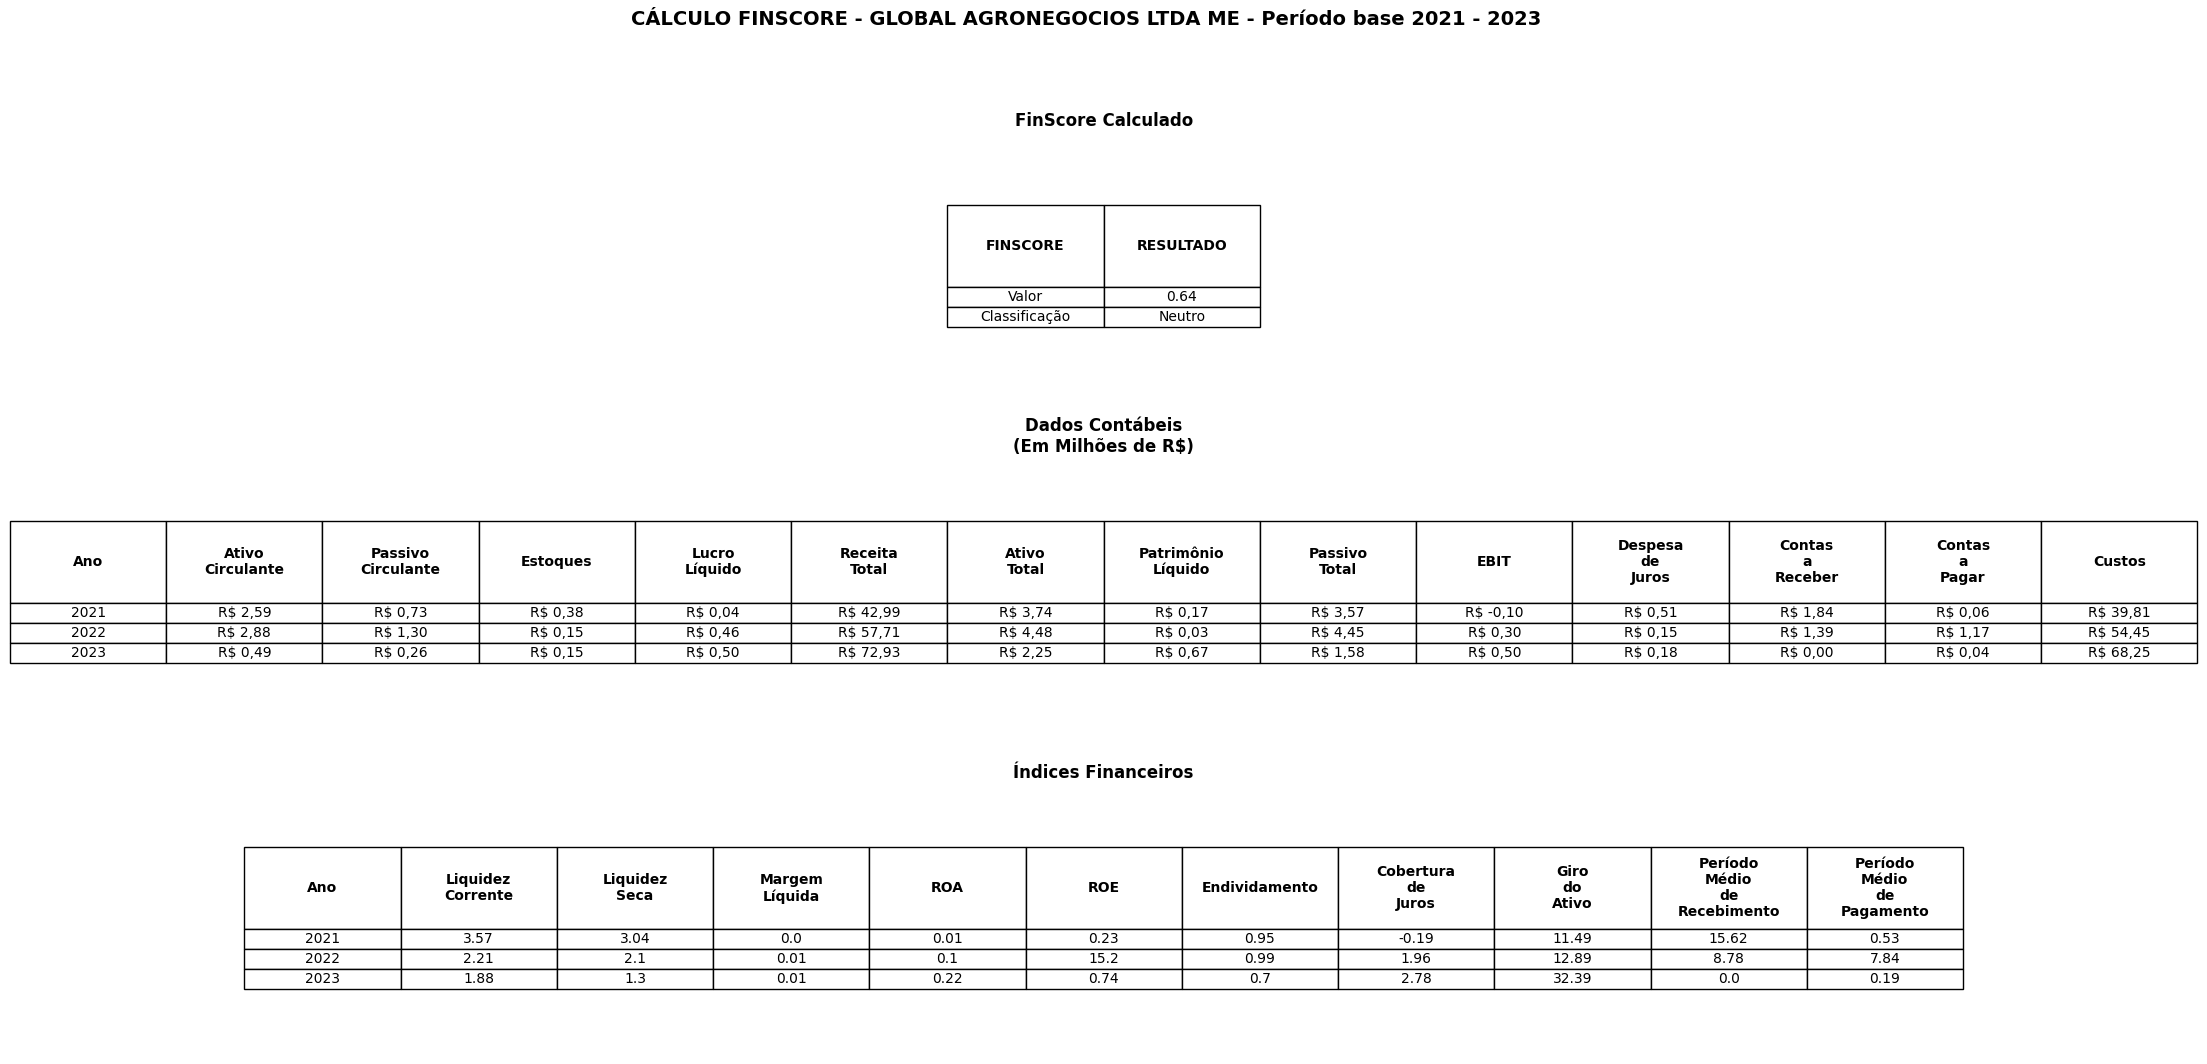

In [335]:
import pandas as pd
import matplotlib.pyplot as plt

## FORMATAR PADRÃO BR
# Cópia do df original
df_dados_contabeis_milhoes = df_dados_contabeis.copy()

# Excluindo a coluna 'Ano' antes de realizar as transformações
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.drop(columns=['Ano'])

# Dividindo os valores das colunas numéricas por 1.000.000
for col in df_dados_contabeis_milhoes.columns:
    df_dados_contabeis_milhoes[col] = df_dados_contabeis_milhoes[col] / 1_000_000

# Formatando os valores para o padrão brasileiro (R$ 1.000.000,00)
df_dados_contabeis_milhoes = df_dados_contabeis_milhoes.applymap(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".") if isinstance(x, (int, float)) else x
)

## INSERIR A COLUNA "ANO" NAS TABELAS "Dados Contábeis" e "Índices Financeiros"
anos = [str(ano_inicial), str(ano_inicial + 1), str(ano_final)]  # Convertendo anos para string

# Inserindo a coluna "Ano" como a primeira coluna e garantindo que todos os valores sejam string
df_dados_contabeis_milhoes.insert(0, "Ano", anos)
df_indices.insert(0, "Ano", anos)

## FINSCORE
resultados_df = pd.DataFrame({
    "FINSCORE": ["Valor", "Classificação"],
    "RESULTADO": [resultados_df.iloc[0, 1], resultados_df.iloc[1, 1]]
})

## INSERINDO QUEBRA DE LINHA NOS CABEÇALHOS
df_dados_contabeis_milhoes.columns = [col.replace(" ", "\n") for col in df_dados_contabeis_milhoes.columns]
df_indices.columns = [col.replace(" ", "\n") for col in df_indices.columns]
resultados_df.columns = [col.replace(" ", "\n") for col in resultados_df.columns]

## CABEÇALHO
# Criando a figura e os subplots para as tabelas
fig, axs = plt.subplots(nrows=3, figsize=(14, 12))
fig.suptitle(f"CÁLCULO FINSCORE - {cliente} - Período base {ano_inicial} - {ano_final}",
             fontsize=14, fontweight="bold")

## TABELAS
# Função para adicionar tabelas formatadas com títulos mais próximos
def add_table(ax, df, title):
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     cellLoc="center", loc="center",
                     colWidths=[0.12] * len(df.columns))  # Ajustando largura das colunas

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Ajustando escala para melhor legibilidade

    # Aumentando a altura da linha do cabeçalho
    for col in range(len(df.columns)):
        table[(0, col)].set_height(0.3)  # Aumentando a altura do cabeçalho

    # Destacando o cabeçalho com negrito
    for key, cell in table._cells.items():
        if key[0] == 0:  # Se for a primeira linha (cabeçalho)
            cell.set_fontsize(10)  # Aumenta a fonte do cabeçalho
            cell.set_text_props(weight='bold')  # Negrito

    # **Reduzindo espaço entre título e tabela**
    ax.set_title(title, fontsize=12, fontweight="bold", pad=2)  # Reduzindo padding
    ax.title.set_y(0.9)  # Movendo o título para mais próximo da tabela

# Adicionando cada tabela com títulos mais próximos
add_table(axs[0], resultados_df, "FinScore Calculado")
add_table(axs[1], df_dados_contabeis_milhoes, "Dados Contábeis\n(Em Milhões de R$)")
add_table(axs[2], df_indices, "Índices Financeiros")

# Exibir as tabelas
plt.show()


#### 5. Prompt IA

In [336]:
print('\n INÍCIO')
print('=====================================')

print('- Crie um relatório interpretando os resultados dos cálculos feitos neste notebook, utilizando os valores das seguintes variáveis:\n')

print('* Cliente:')
print('-------------------------------')
print(cliente)

print('\n * Período da analise:')
print('-------------------------------')
print(ano_inicial, '-', ano_final)

print('\n * Dados contábeis:')
print('-------------------------------')
print(df_dados_contabeis)

print('\n * Índices Contábeis:')
print('-------------------------------')
print(df_indices)

print('\n - Analise o Cliente com base nos dfs abaixo. Interprete as saídas à vista dos dados contábeis e dos índices contábeis supracitados, contextualizando em termos de capacidade de pagamento, liquidez e resultados operacionais o que os resultados indicam.')

print('\n RESULTADOS PCA')
print('=====================================')

print('\n DF: indices_scaled:')
print('-------------------------------')
print(indices_scaled)

print('\n DF: pca_result:')
print('-------------------------------')
print(pca_result)

print('\n DF: explained_variance_ratio:')
print('-------------------------------')
print(explained_variance_ratio)

print('\n DF: pca_df:')
print('-------------------------------')
print(pca_df)

print('\n DF: loadings:')
print('-------------------------------')
print(loadings)

print('\n Evite termos estatísticos e técnicos, sequer é necessário apresentar os valores relacionados ao PCA, mas cite os valores e contas dos dataframes df_dados_contabeis e df_indices, com a devida explicação (o que a conta ou índice significa), implicação em relação aos resultados e valores citados.')

print('\n Após esta contextualização, com base nos resultados do PCA (RESULTADOS PCA), apresente a tabela resumo citada em 4.2:')

print('\n O importante é você fechar com os valores da variável "escores_consolidados" e "categoria", com a devida interpretação final.')

print('\n FIM')
print('=====================================')



 INÍCIO
- Crie um relatório interpretando os resultados dos cálculos feitos neste notebook, utilizando os valores das seguintes variáveis:

* Cliente:
-------------------------------
GLOBAL AGRONEGOCIOS LTDA ME

 * Período da analise:
-------------------------------
2021 - 2023

 * Dados contábeis:
-------------------------------
   Ano  Ativo Circulante  Passivo Circulante   Estoques  Lucro Líquido  \
0    1        2593954.47           727602.60  383912.38       39546.67   
1    2        2877244.94          1301079.74  148715.61      455923.83   
2    3         492603.10           262306.70  152802.05      495703.34   

   Receita Total  Ativo Total  Patrimônio Líquido  Passivo Total       EBIT  \
0    42985389.70   3741944.68            172180.0     3569764.68  -98569.70   
1    57707592.41   4477462.29             30000.0     4447462.29  296881.49   
2    72929552.94   2251497.29            672808.5     1578688.79  495639.94   

   Despesa de Juros  Contas a Receber  Contas a Pagar